In [1]:
# standard regular-use python packages
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# standard astropy packages
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u

# packages needed for plotting
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# packages needed to use Leja et al. (2022) normalizing flows results
import os
from astropy.convolution import Gaussian1DKernel, convolve
from scipy.stats import norm

# standard imports for my work
from bpt_utils import *
from read_transients_data import *
from correct_redshift_evolution import *
from generate_bkg_galaxies import *
from helper_functions import *

# set up plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['image.origin'] = 'lower'
sns.set_context('talk') 
sns.set(font_scale=1.6)
sns.set_palette('colorblind')
sns.set_style('ticks')
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'Verdana', 'Lucida Grande', 'DejaVu Sans']



In [2]:
# Host DM distribution
logDM = np.linspace(0, 10, 1000)
dlogDM = logDM[1]-logDM[0]
prob = norm.pdf(logDM, 4.8, 0.5)

DM_IGM = 180 # expected median IGM contribution at z=0.2
# DMexgal of hostless FRBs
hostless_frbs = ["augustine", "hamilton", "wilhelm", "johndoe", "zeynep", "bert", 
                 "davina", "jonas", "freya", "ada", "bruce", "ayo"]
pvalue_arr = []
for i in range(len(hostless_frbs)):
    frb = hostless_frbs[i]
    DMexgal = get_DMexgal(frb) - DM_IGM # worst-case scenario
    pvalue = (1-(dlogDM*sum(prob[logDM<np.log(DMexgal)])))
    pvalue_arr.append(pvalue)
    print(frb, DMexgal, pvalue)

# p-values by removing z = DM/900 IGM contribution
pvalues = [" = 0.4842", " = 0.0592", " = 0.0206", " = 0.0069", 
           " = 0.0055", " = 0.0049", " = 0.0014", " = 0.0012", 
           " = 0.0004", " = 5 \cdot 10^{-5}", 
           " = 9 \cdot 10^{-6}", " = 2 \cdot 10^{-6}"]


augustine 123.73140000000001 0.48418994830365936
hamilton 265.6 0.059239790173759466
wilhelm 337.35 0.02059185348953496
johndoe 417.35 0.006906246230314328
zeynep 431.6 0.005508098778192916
bert 443.9 0.004908273756232706
davina 537.2938 0.0014289050900205824
jonas 556.95 0.001172355258051816
freya 661.48 0.0003584416312069072
ada 856.45 4.739231614647732e-05
bruce 1030.5500000000002 9.179985646867728e-06
ayo 1213.7757 2.069465596332698e-06


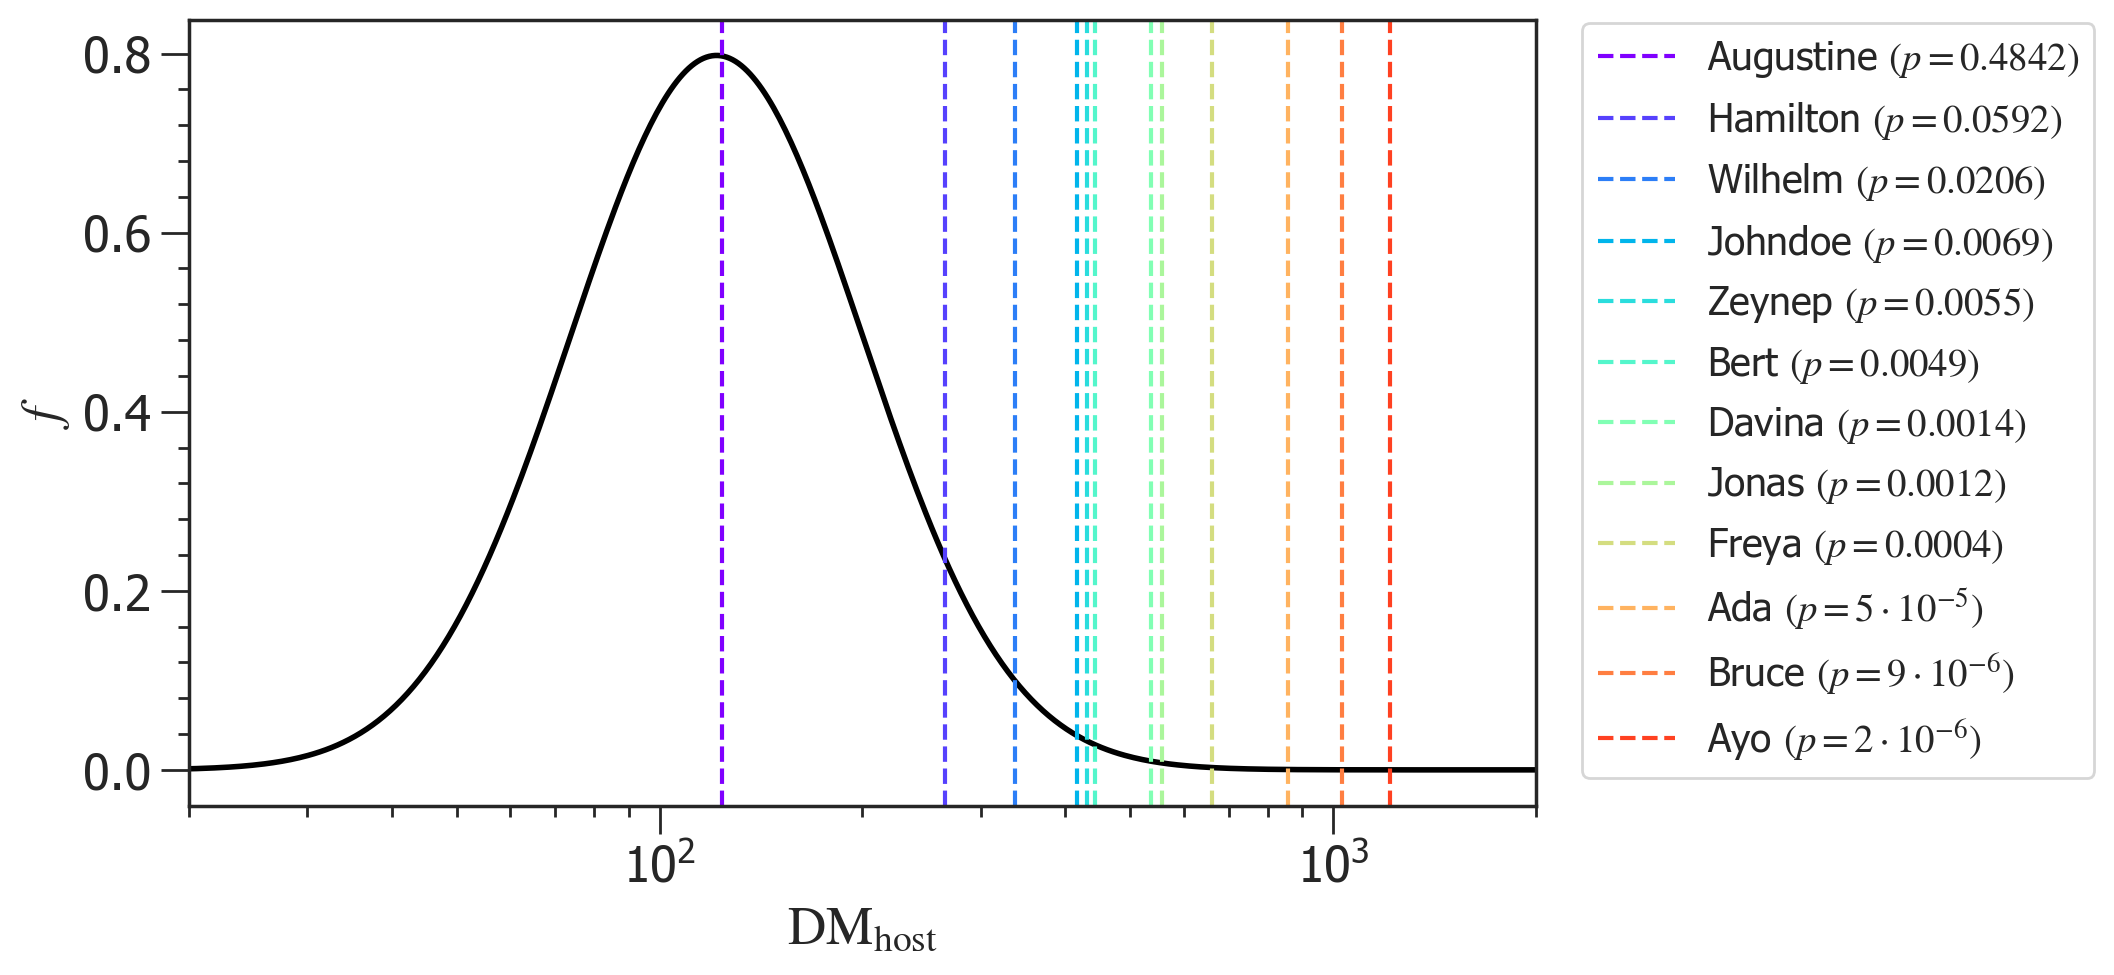

In [3]:
fig = plt.figure(figsize=(12, 7))
grid = plt.GridSpec(4, 4, hspace=0.45, wspace=0.6)

ax = fig.add_subplot(grid[:-1, 1:])

ax.plot(np.exp(logDM), prob, color="black", lw=2)
ax.set_xscale('log')

cmap = matplotlib.cm.get_cmap('rainbow')
colors = [cmap(i/len(hostless_frbs)) for i in range(len(hostless_frbs))]
for i in range(len(hostless_frbs)):
    frb = hostless_frbs[i]
    DMexgal = get_DMexgal(frb)
    ax.axvline(DMexgal-DM_IGM, ls="--", color=colors[i], label=frb[0].upper()+frb[1:]+r" $(p {})$".format(pvalues[i]), lw=1.5)
    
ax.set_xlabel(r'$\mathrm{DM}_\mathrm{host}$')
ax.set_ylabel(r'$f$')

ax.set_yticks(np.arange(0, 1, 0.2))                                                                                                                                                                                                                              
ax.yaxis.set_major_locator(MultipleLocator(0.2))                                                                                                                                                                                                                     
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.set_xlim(20, 2e3)
ax.tick_params(direction='out', length=6, width=1, top=False, right=False)
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=4)
ax.legend(loc="upper left", fontsize=14, bbox_to_anchor=(1.02, 1.02))

plt.savefig('/Users/krittisharma/Desktop/research/frb_hosts/results_v2/figures/hostDMdistribution.png', dpi=400, bbox_inches='tight')


In [4]:
import itertools
combinations = itertools.combinations(pvalue_arr, 5)
total_sum = sum(np.prod(comb) for comb in combinations)
total_sum

1.1277204440443371e-07